**1.Using the IMDb Movie Rating Data:**

**2.convert it into a CSV file**

In [1]:
import numpy as np
import pandas as pd

In [3]:
basics = pd.read_csv("titlebasics.tsv", delimiter = "\t")
basics.to_csv('title_basics.csv')
basics.head(5)

/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


**3.find the average rank of the 10 most popular movies between 2000-2009 (inclusive)**

In [4]:
ratings = pd.read_csv("titleratings.tsv", delimiter = "\t")
ratings.to_csv('title_ratings.csv')
ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1672
1,tt0000002,6.1,208
2,tt0000003,6.5,1396
3,tt0000004,6.2,123
4,tt0000005,6.2,2187


In [5]:
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')

In [6]:
year = basics[(basics['startYear'] >= 2000) & (basics['startYear'] <= 2009) & (basics['titleType'] == "movie")]
year.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0.0,2000.0,\N,60,\N
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0.0,2001.0,\N,118,"Comedy,Fantasy,Romance"
63462,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0.0,2000.0,\N,97,"Action,Crime"
85714,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0.0,2008.0,\N,90,Documentary
86825,tt0088751,movie,The Naked Monster,The Naked Monster,0.0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"
93967,tt0096056,movie,Crime and Punishment,Crime and Punishment,0.0,2002.0,\N,126,Drama
95409,tt0097540,movie,Responso,Responso,0.0,2004.0,\N,81,\N
100116,tt0102362,movie,Istota,Istota,0.0,2000.0,\N,80,"Drama,Romance"
105368,tt0107706,movie,Nothing,Nothing,0.0,2000.0,\N,\N,\N
106192,tt0108549,movie,West from North Goes South,West from North Goes South,0.0,2004.0,\N,96,"Comedy,Mystery"


In [7]:
merge = pd.merge(year, ratings, on='tconst')
merge.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0.0,2000.0,\N,60,\N,5.4,11
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0.0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,78762
2,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0.0,2000.0,\N,97,"Action,Crime",7.0,172
3,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0.0,2008.0,\N,90,Documentary,7.7,13
4,tt0088751,movie,The Naked Monster,The Naked Monster,0.0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.4,275
5,tt0096056,movie,Crime and Punishment,Crime and Punishment,0.0,2002.0,\N,126,Drama,5.8,641
6,tt0097540,movie,Responso,Responso,0.0,2004.0,\N,81,\N,7.4,5
7,tt0102362,movie,Istota,Istota,0.0,2000.0,\N,80,"Drama,Romance",4.8,10
8,tt0108549,movie,West from North Goes South,West from North Goes South,0.0,2004.0,\N,96,"Comedy,Mystery",7.7,23
9,tt0109173,movie,Auf allen Meeren,Auf allen Meeren,0.0,2002.0,\N,95,Documentary,7.8,26


In [8]:
popular_movies =  merge.sort_values('numVotes', ascending = False)
popular_movies.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
64,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0.0,2001.0,\N,178,"Action,Adventure,Drama",8.8,1651082
349,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0.0,2003.0,\N,201,"Action,Adventure,Drama",8.9,1634231
350,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0.0,2002.0,\N,179,"Action,Adventure,Drama",8.7,1477609
400,tt0172495,movie,Gladiator,Gladiator,0.0,2000.0,\N,155,"Action,Adventure,Drama",8.5,1334271
1020,tt0209144,movie,Memento,Memento,0.0,2000.0,\N,113,"Mystery,Thriller",8.4,1120136
8110,tt0325980,movie,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,0.0,2003.0,\N,143,"Action,Adventure,Fantasy",8.0,1012015
3550,tt0266697,movie,Kill Bill: Vol. 1,Kill Bill: Vol. 1,0.0,2003.0,\N,111,"Action,Crime,Thriller",8.1,995445
3541,tt0266543,movie,Finding Nemo,Finding Nemo,0.0,2003.0,\N,100,"Adventure,Animation,Comedy",8.1,944979
3698,tt0268978,movie,A Beautiful Mind,A Beautiful Mind,0.0,2001.0,\N,135,"Biography,Drama",8.2,844237
3368,tt0264464,movie,Catch Me If You Can,Catch Me If You Can,0.0,2002.0,\N,141,"Biography,Crime,Drama",8.1,823574


In [9]:
popular_movies.head(10)['averageRating'].mean()

8.379999999999999

In [10]:
votes = ratings[ratings['numVotes'] >= 1000]
votes.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1672
2,tt0000003,6.5,1396
4,tt0000005,6.2,2187
7,tt0000008,5.4,1842
9,tt0000010,6.9,6155
11,tt0000012,7.4,10552
12,tt0000013,5.7,1600
13,tt0000014,7.1,4713
15,tt0000016,5.9,1222
21,tt0000023,5.7,1168


In [11]:
merge2 = pd.merge(basics, votes, on = 'tconst')
merge2.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short",5.7,1672
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1396
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short",6.2,2187
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,\N,1,"Documentary,Short",5.4,1842
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,\N,1,"Documentary,Short",6.9,6155
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",7.4,10552
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0.0,1895.0,\N,1,"Documentary,Short",5.7,1600
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0.0,1895.0,\N,1,"Comedy,Short",7.1,4713
8,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"Documentary,Short",5.9,1222
9,tt0000023,short,The Sea,Baignade en mer,0.0,1895.0,\N,1,"Documentary,Short",5.7,1168


4.find the year in the 1900s when the average rank increased the most, compared to the previous year. 
(Ignore movies with votes < 1000)

In [12]:
year2 = merge2[(merge2['startYear'] >= 1900) & (merge2['startYear'] < 2000) & (merge2['titleType'] == "movie")]
year2.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
41,tt0002130,movie,Dante's Inferno,L'Inferno,0.0,1911.0,\N,71,"Adventure,Drama,Fantasy",7.1,2335
45,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0.0,1913.0,\N,54,"Crime,Drama",7.0,1977
46,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0.0,1913.0,\N,61,"Crime,Drama",7.0,1370
47,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0.0,1913.0,\N,90,"Crime,Drama,Mystery",7.0,1071
48,tt0003419,movie,The Student of Prague,Der Student von Prag,0.0,1913.0,\N,85,"Drama,Fantasy,Horror",6.5,1824
50,tt0003643,movie,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',0.0,1914.0,\N,78,"Crime,Drama,Horror",6.4,1134
52,tt0003740,movie,Cabiria,Cabiria,0.0,1914.0,\N,148,"Adventure,Drama,History",7.1,3156
55,tt0003930,movie,Fantomas: The Mysterious Finger Print,Fantômas contre Fantômas,0.0,1914.0,\N,59,"Crime,Drama",6.9,1179
58,tt0004026,movie,The Golem,Der Golem,0.0,1915.0,\N,60,Horror,6.8,1054
60,tt0004181,movie,Judith of Bethulia,Judith of Bethulia,0.0,1914.0,\N,61,Drama,6.1,1252


In [13]:
year2.tail(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
17893,tt0301050,movie,Bolivia,Bolivia,0.0,1999.0,\N,75,Drama,7.3,1087
17894,tt0301082,movie,Cardcaptor Sakura: The Movie,Gekijô-ban Kâdokaputâ Sakura,0.0,1999.0,\N,80,"Adventure,Animation,Family",7.4,1454
17928,tt0302282,movie,Aslan Bacanak,Aslan Bacanak,0.0,1977.0,\N,93,Comedy,6.9,1059
17964,tt0303780,movie,Blues Harp,Blues Harp,0.0,1998.0,\N,107,"Crime,Drama,Music",7.0,1003
18027,tt0306519,movie,Barschel: A Murder in Geneva,Barschel - Mord in Genf,0.0,1993.0,\N,74,Drama,1.6,1186
18190,tt0313573,movie,Selamsiz's Band,Selamsiz Bandosu,0.0,1987.0,\N,107,"Comedy,Drama,Music",7.8,3414
18254,tt0316078,movie,Respect for Love,Kadhalukku Mariyadhai,0.0,1997.0,\N,165,"Drama,Romance",7.6,1665
18430,tt0323869,movie,Saint Seiya: Evil Goddess Eris,Seinto Seiya: Jashin Erisu,0.0,1987.0,\N,46,"Action,Animation,Fantasy",6.5,1176
18482,tt0326143,movie,Saint Seiya: Legend of Crimson Youth,Seinto Seiya: Shinku no shônen densetsu,0.0,1988.0,\N,71,"Action,Animation,Fantasy",7.3,1128
18601,tt0330536,movie,A Colt Is My Passport,Koruto wa ore no pasupooto,0.0,1967.0,\N,84,"Action,Crime",7.4,1661


In [14]:
result = year2.groupby('startYear').agg(values = ('averageRating', np.mean)).reset_index()
result

,startYear,values
0,1911.0,7.100000
1,1913.0,6.875000
2,1914.0,6.560000
3,1915.0,6.760000
4,1916.0,6.950000
...,...,...
83,1995.0,6.406702
84,1996.0,6.320305
85,1997.0,6.408046
86,1998.0,6.410337


In [15]:
maximum = 0
final_year = 0
for i in range(1, len(result)):
    x = result.loc[i, 'values']
    y = result.loc[i-1, 'values']
    temp = abs(x - y)
    if (temp > maximum):
        maximum = temp
        final_year = result.loc[[i], ['startYear']]
final_year

,startYear
17,1929.0


In [16]:
merge2.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short",5.7,1672
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1396
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short",6.2,2187
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,\N,1,"Documentary,Short",5.4,1842
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,\N,1,"Documentary,Short",6.9,6155
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",7.4,10552
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0.0,1895.0,\N,1,"Documentary,Short",5.7,1600
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0.0,1895.0,\N,1,"Comedy,Short",7.1,4713
8,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"Documentary,Short",5.9,1222
9,tt0000023,short,The Sea,Baignade en mer,0.0,1895.0,\N,1,"Documentary,Short",5.7,1168


In [17]:
movies = merge2[merge2['titleType'] == "movie"]
movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
41,tt0002130,movie,Dante's Inferno,L'Inferno,0.0,1911.0,\N,71,"Adventure,Drama,Fantasy",7.1,2335
45,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0.0,1913.0,\N,54,"Crime,Drama",7.0,1977
46,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0.0,1913.0,\N,61,"Crime,Drama",7.0,1370
47,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0.0,1913.0,\N,90,"Crime,Drama,Mystery",7.0,1071
48,tt0003419,movie,The Student of Prague,Der Student von Prag,0.0,1913.0,\N,85,"Drama,Fantasy,Horror",6.5,1824
...,...,...,...,...,...,...,...,...,...,...,...
18648,tt0332639,movie,Together,He ni zai yi qi,0.0,2002.0,\N,116,"Drama,Music",7.3,4218
18649,tt0332658,movie,Intermission,Intermission,0.0,2003.0,\N,105,"Comedy,Crime,Drama",6.8,15178
18650,tt0332712,movie,My Baby's Daddy,My Baby's Daddy,0.0,2004.0,\N,86,Comedy,4.6,3477
18651,tt0332831,movie,Springtime in a Small Town,Xiao cheng zhi chun,0.0,2002.0,\N,116,"Drama,Romance",6.9,1257


In [18]:
eachyear = movies.groupby('startYear').agg(avg = ('averageRating', np.mean)).reset_index()

In [19]:
eachyear

,startYear,avg
0,1911.0,7.100
1,1913.0,6.875
2,1914.0,6.560
3,1915.0,6.760
4,1916.0,6.950
...,...,...
98,2010.0,5.500
99,2011.0,2.650
100,2012.0,6.400
101,2016.0,7.100


In [20]:
eachyear.tail(10)

,startYear,avg
93,2005.0,5.848276
94,2006.0,6.314286
95,2007.0,5.937500
96,2008.0,7.200000
97,2009.0,7.700000
98,2010.0,5.500000
99,2011.0,2.650000
100,2012.0,6.400000
101,2016.0,7.100000
102,2018.0,6.800000


5.find the expected average rank for 2013 using linear regression. How good is this regression? 
(Ignore movies with votes < 1000.)


In [21]:
eachyear = eachyear[eachyear['startYear'] == 2013]
eachyear

,startYear,avg
0,1911.0,7.100
1,1913.0,6.875
2,1914.0,6.560
3,1915.0,6.760
4,1916.0,6.950
...,...,...
98,2010.0,5.500
99,2011.0,2.650
100,2012.0,6.400
101,2016.0,7.100


In [22]:
eachyear.tail(10)

,startYear,avg
93,2005.0,5.848276
94,2006.0,6.314286
95,2007.0,5.937500
96,2008.0,7.200000
97,2009.0,7.700000
98,2010.0,5.500000
99,2011.0,2.650000
100,2012.0,6.400000
101,2016.0,7.100000
102,2018.0,6.800000


In [23]:
from sklearn.linear_model import LinearRegression
x = eachyear['startYear'].values.reshape(-1,1)
y = eachyear['avg'].values.reshape(-1,1)

In [24]:
model = LinearRegression().fit(x,y)

In [25]:
xtest = np.array([2013]).reshape(-1,1)
y_pred = model.predict(xtest)
print(y_pred)

[[6.19844128]]


In [26]:
import matplotlib.pyplot as plt

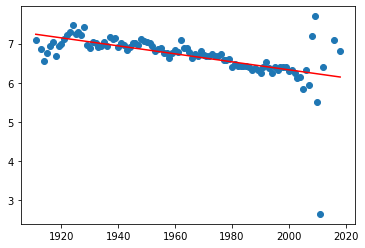

In [27]:
pred2 = model.predict(x)
plt.scatter(x, y)
plt.plot(x, pred2, color='red')
plt.show()

6.find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?


In [28]:
year3 = basics[(basics['startYear']>= 1900) & (basics['startYear'] < 2000) & (basics['titleType'] == "movie")]

In [29]:
year3.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0.0,1900.0,\N,\N,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,\N,70,"Biography,Crime,Drama"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0.0,1908.0,\N,\N,Drama
668,tt0000675,movie,Don Quijote,Don Quijote,0.0,1908.0,\N,\N,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908.0,\N,120,"Adventure,Fantasy"
729,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,0.0,1908.0,\N,\N,Drama
783,tt0000793,movie,Andreas Hofer,Andreas Hofer,0.0,1909.0,\N,\N,Drama
802,tt0000812,movie,El blocao Velarde,El blocao Velarde,0.0,1909.0,\N,\N,\N


In [30]:
merge3 = pd.merge(ratings, year3, on = 'tconst')
merge3.head(10)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000335,6.0,39,movie,Soldiers of the Cross,Soldiers of the Cross,0.0,1900.0,\N,\N,"Biography,Drama"
1,tt0000502,4.5,8,movie,Bohemios,Bohemios,0.0,1905.0,\N,100,\N
2,tt0000574,6.1,610,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,\N,70,"Biography,Crime,Drama"
3,tt0000615,4.5,14,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,\N,\N,Drama
4,tt0000630,3.2,11,movie,Hamlet,Amleto,0.0,1908.0,\N,\N,Drama
5,tt0000675,4.9,9,movie,Don Quijote,Don Quijote,0.0,1908.0,\N,\N,Drama
6,tt0000679,5.2,35,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908.0,\N,120,"Adventure,Fantasy"
7,tt0000739,6.3,7,movie,El pastorcito de Torrente,El pastorcito de Torrente,0.0,1908.0,\N,\N,Drama
8,tt0000793,5.0,7,movie,Andreas Hofer,Andreas Hofer,0.0,1909.0,\N,\N,Drama
9,tt0000862,4.5,8,movie,Faldgruben,Faldgruben,0.0,1909.0,\N,\N,\N


In [31]:
years = list(merge3['startYear'].unique())
Corr_year = pd.DataFrame()
for year in years:
    X = merge3[merge3['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    Corr_year = Corr_year.append(newRow, ignore_index=True)
Corr_year = Corr_year.reindex(columns=['Year', 'Correlation'])
Corr_year

,Year,Correlation
0,1900.0,-0.125472
1,1905.0,0.207904
2,1906.0,0.938861
3,1907.0,0.024180
4,1908.0,-0.012043
...,...,...
95,1997.0,0.119304
96,1903.0,0.747010
97,1902.0,NaN
98,1904.0,0.646936


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


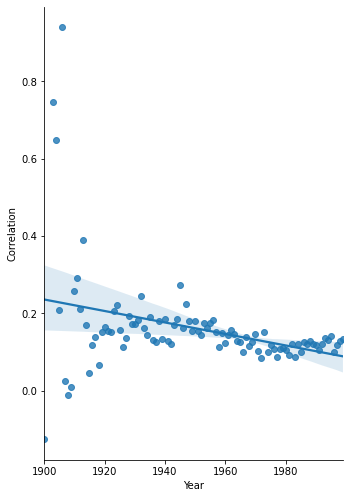

In [35]:

import seaborn as sns
sns.pairplot(Corr_year, x_vars='Year', y_vars='Correlation', size=7, aspect=0.7, kind='reg')